### Segmentation of mixotroph ASVs into "communities", then identifying predictors of those communities.

FlashWeave does all these conditional tests to clarify its associations. Does this actually lead to better results than a SOM over the ASV table (using samples as "random vectors") would?

In [4]:
import networkx as nx
#import biom

In [5]:
network_16S_18Sv9_alldepths = nx.read_gml("counts_mvars_16S_and_18S/network_16S_18Sv9_alldepths.gml")
network_16S_18Sv9_alldepths.number_of_nodes(), network_16S_18Sv9_alldepths.number_of_edges(),\
#dict(network_16S_18Sv9_alldepths.degree())

(24930, 13684)

In [6]:
#could we get 2 subgraphs and then see how connected their nodes are? 
#like, what's the mean weight of an interconnection between them, if such even exists.

In [7]:
components = list(nx.connected_components(network_16S_18Sv9_alldepths))
component_subgraph = nx.subgraph(network_16S_18Sv9_alldepths, components[0])

Import the CM, dino & nondino ASV variables. Can:
1) extract a subgraph of only mutual connections among those nodes
2) find attribute associativity after applying as node attribute.
3) cluster based on positive/negative connections, if there are any.

In [8]:
import pandas as pd

In [9]:
asv_freqs_18Sv9 = pd.read_csv("01_out_asv_proportions_18Sv9.tsv", sep = "\t", index_col=0)
asv_taxo_mft_18Sv9 = pd.read_csv("01_out_asv_taxo_mft_18Sv9.tsv", sep = "\t", index_col=0, na_filter=False)
CM_asvs_18Sv9 = asv_taxo_mft_18Sv9.loc[ asv_taxo_mft_18Sv9["MFT"].str.match("CM") ].index
CM_classes_18Sv9 = asv_taxo_mft_18Sv9.loc[CM_asvs_18Sv9, "Taxon"].apply(lambda x: x.split(";")[3])
dino_CM_asvs_18Sv9 = CM_asvs_18Sv9[ CM_classes_18Sv9.str.contains("Dinoflagellata") ]
nondino_CM_asvs_18Sv9 = CM_asvs_18Sv9[ CM_classes_18Sv9.str.contains("Dinoflagellata").apply(lambda x: not x) ]

In [14]:
CM_subgraph = nx.subgraph(network_16S_18Sv9_alldepths, asv_taxo_mft_18Sv9.loc[CM_asvs_18Sv9, "most_specific_name"].unique())

In [13]:
CM_subgraph.number_of_nodes(), CM_subgraph.number_of_edges()

(52, 9)

In [19]:
nx.number_connected_components(network_16S_18Sv9_alldepths),\
nx.number_of_isolates(network_16S_18Sv9_alldepths),\
nx.number_of_selfloops(network_16S_18Sv9_alldepths)

(20660, 20658, 0)

In [20]:
nx.number_connected_components(CM_subgraph),\
nx.number_of_isolates(CM_subgraph),\
nx.number_of_selfloops(CM_subgraph)

(43, 38, 0)

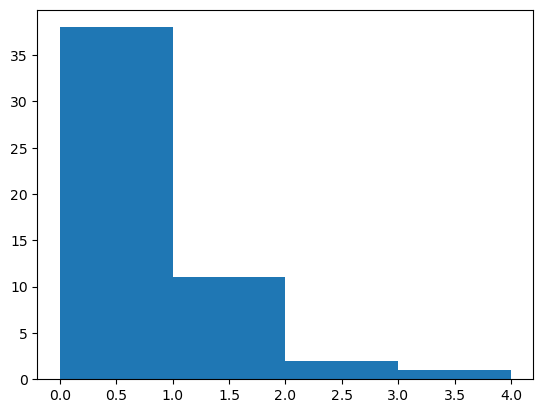

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
node_degrees = pd.Series(dict(nx.degree(CM_subgraph)))
plt.hist(node_degrees, bins = np.arange(0,5))
plt.show()

#majority of nodes are degree 0... since this is an
#undirected graph it means they have no edges.

In [44]:
pd.Series(nx.get_edge_attributes(CM_subgraph, "weight"))
#CM_subgraph.edges[edge_list[0]]

Karlodinium_veneficum          Pentapharsodinium_tyrrhenicum    0.116732
Tripos_fusus                   Tripos_furca                     0.233207
Pentapharsodinium_tyrrhenicum  Lingulodinium_polyedra          -0.588952
Lepidodinium_viride            Paragymnodinium_shiwhaense       0.154221
Fibrocapsa_japonica            Tripos_furca                     0.486375
Biecheleriopsis_adriatica      Biecheleria_cincta               0.353479
Paragymnodinium_shiwhaense     Chrysochromulina_acantha         0.160256
Triparma_pacifica              Triparma_mediterranea            0.319631
Alexandrium_pseudogonyaulax    Tripos_furca                     0.487636
dtype: float64

In [82]:
#nx.get_node_attributes(network_16S_18Sv9_alldepths, name='mv')#
mvar_nodes = []
asv_nodes = []
for node in network_16S_18Sv9_alldepths.nodes:
    if network_16S_18Sv9_alldepths.nodes[node]["mv"] == 1:
        mvar_nodes.append(node)
    else:
        asv_nodes.append(node)
mvar_nodes

['Cast_Type_Prodo',
 'Cast_Type_Ros',
 'Cast_Type_Ross',
 'Cast_Type_unknown',
 'Cardinal_Sta_False',
 'Cardinal_Sta_True',
 'Cardinal_Sta_unknown',
 'Lat_Dec',
 'Lon_Dec',
 'Bottle_Depth',
 'T_degC',
 'Salnty',
 'STheta',
 'O2ml_L',
 'PO4ug',
 'SiO3ug',
 'NO3ug',
 'MLD_Sigma',
 'year',
 'month',
 'season_fall',
 'season_spring',
 'season_summer',
 'season_winter',
 'Mins_since_0000',
 'MixedLayer_Outlier_CM_dominated',
 'MixedLayer_Outlier_diatom_dominated',
 'MixedLayer_Outlier_not']

In [56]:
#for me: the next big question is, is it possible to get greater inter-CM correlations with MLD samples only? 
#I think we can give up on CM clustering with the co-occurrence network alone. Not enough data except
#for the highest abundance CMs.
network_18Sv9_MLD = nx.read_gml("flashweave_results/network_18Sv9_MLD_sensitive_heterogenous.gml")
CM_node_list = list(asv_taxo_mft_18Sv9.loc[CM_asvs_18Sv9, "most_specific_name"].unique())
full_node_list = CM_node_list + mvar_nodes
CM_subgraph_18Sv9_MLD = nx.subgraph(network_18Sv9_MLD, CM_node_list)
CM_mvar_subgraph_18Sv9_MLD = nx.subgraph(network_18Sv9_MLD, full_node_list)

In [57]:
pd.Series(nx.get_edge_attributes(CM_subgraph_18Sv9_MLD, "weight"))

Gonyaulax_polygramma         Tripos_fusus                   0.158130
Karlodinium_veneficum        Karenia_mikimotoi              0.204664
Geminigera_cryophila:nucl    Alexandrium_pseudogonyaulax    0.307946
Lepidodinium_viride          Paragymnodinium_shiwhaense     0.123613
Biecheleriopsis_adriatica    Biecheleria_cincta             0.318824
Paragymnodinium_shiwhaense   Biecheleria_cincta             0.171373
Triparma_pacifica            Triparma_mediterranea          0.374011
Alexandrium_pseudogonyaulax  Tripos_furca                   0.515988
dtype: float64

In [78]:
edge_weights = pd.Series(nx.get_edge_attributes(CM_mvar_subgraph_18Sv9_MLD, "weight"))
mask = [index[0] in CM_node_list for index in edge_weights.index]
edge_weights[mask]
#pd.Series(edge_weights.index).apply(lambda x: x[0])
#with pd.option_context("display.max_rows", None):
#    display(pd.Series(nx.get_edge_attributes(CM_mvar_subgraph_18Sv9_MLD, "weight")))

Tripos_fusus                 Gonyaulax_polygramma                   0.158130
                             Lon_Dec                                0.146143
                             season_spring                         -0.152757
                             MixedLayer_Outlier_CM_dominated        0.129358
Paragymnodinium_shiwhaense   Lepidodinium_viride                    0.123613
                             Biecheleria_cincta                     0.171373
Triparma_pacifica            Triparma_mediterranea                  0.374011
                             season_spring                          0.132269
Blastodinium_mangini         season_summer                         -0.191517
Blastodinium_galatheanum     MixedLayer_Outlier_CM_dominated        0.497419
Cymbomonas_tetramitiformis   Cast_Type_unknown                      0.252743
                             SiO3ug                                 0.267845
Biecheleriopsis_adriatica    Biecheleria_cincta                     0.318824

### step 2: neighborhoods of dino and non-dino CSVs: how much crossover

Basically finding that there's not many direct associations between CMs and most of those are positive.

Now if there's (in)direct associations with bacteria which contribute to one group or another of dinos dominating...

Positive and negative neighborhoods = all nonzero edges, positive and negative, between a dino or nondino CM and a... right, so filter the metavariables out.

In [96]:
#neighborhoods should combine all the results from all the dino/nondino species.
dino_CM_node_list = asv_taxo_mft_18Sv9.loc[dino_CM_asvs_18Sv9, "most_specific_name"].unique()
nondino_CM_node_list = asv_taxo_mft_18Sv9.loc[nondino_CM_asvs_18Sv9, "most_specific_name"].unique()

dino_CM_positive_neighborhood = set()
nondino_CM_positive_neighborhood = set()
dino_CM_negative_neighborhood = set()
nondino_CM_negative_neighborhood = set()

adjacency_dict = dict(network_16S_18Sv9_alldepths.adjacency())
for CM_node in CM_node_list:
    if CM_node not in network_16S_18Sv9_alldepths.nodes():
        continue
    edges = pd.Series(
        [attributes["weight"] for attributes in adjacency_dict[CM_node].values()],
        index = adjacency_dict[CM_node].keys(),
        dtype = object
    )
    edges = edges[edges.index.intersection(asv_nodes)]
    if CM_node in dino_CM_node_list:
        for edge in edges[edges > 0].index:
            dino_CM_positive_neighborhood.add(edge)
        for edge in edges[edges < 0].index:
            dino_CM_negative_neighborhood.add(edge)
    else:
        for edge in edges[edges > 0].index:
            nondino_CM_positive_neighborhood.add(edge)
        for edge in edges[edges < 0].index:
            nondino_CM_negative_neighborhood.add(edge)

In [100]:
len(dino_CM_positive_neighborhood),\
len(dino_CM_negative_neighborhood)

(140, 52)

In [101]:
len(nondino_CM_positive_neighborhood),\
len(nondino_CM_negative_neighborhood)

(85, 32)

In [104]:
dino_CM_positive_neighborhood.intersection(dino_CM_negative_neighborhood)

{'0f7d7e0293b0b1ecf7915c5d9251b932',
 '38b73295285fc2e17a8f6915533541cf',
 'Pentapharsodinium_tyrrhenicum',
 'Prymnesiophyceae_Clade_D_XX_sp',
 'e474abad58a2dace7bcebb77283e5a1c'}

In [105]:
dino_CM_positive_neighborhood.intersection(nondino_CM_positive_neighborhood)

{'38b73295285fc2e17a8f6915533541cf',
 '45a15300083d27784555429556594e1c',
 '5240c83dc699f7d63734f03abbd5d6aa',
 '5b0d64b13238ee1991c15a9913bec9bc',
 '7c4c29936fc94689c8e0497d297479b9',
 '86b53126c3e1a80680c5399d1fe90b88',
 'Dinophyceae_XXX_sp',
 'Mesodinium_sp',
 'Paragymnodinium_shiwhaense',
 'Picozoa_XXXXX_sp',
 'Plagioselmis_prolonga',
 'Prymnesiophyceae_Clade_D_XX_sp',
 'Tripos_furca'}

In [106]:
dino_CM_positive_neighborhood.intersection(nondino_CM_negative_neighborhood)

{'MAST-3I_sp'}

In [107]:
nondino_CM_positive_neighborhood.intersection(dino_CM_negative_neighborhood)

{'38b73295285fc2e17a8f6915533541cf',
 '5f73db52fbb5880b19d979a7d70c8ea5',
 'Prymnesiophyceae_Clade_D_XX_sp'}

In [108]:
nondino_CM_positive_neighborhood.intersection(nondino_CM_negative_neighborhood)

{'d0ec7f2a454ed03efee8ed04dd78614b'}

So maybe there's something here: network is not particularly well connected, but this does mean that theres's not much overlap between the neighborhoods. Redo the annotation system with a biom file for ID - that way we can have a more formal system for identifying an ASV as euk or bac + its taxonomy.
- every id should just be "euk{id}" or "bac{id}" 
- separate networks for 16S + 18Sv4 and 16S + v9. separate variables of "euk proportion", "bac proportion" for each neighborhood (so 4 variables per network), can participate in single model AIC comparisons. (the aim is not/no longer to create a perfect predictor).
- make some charts to check if the binomial model could work, and which variables it could work for... but honestly it's tough since zeroes are distributed through all categories, are probably majorities in all categories. so could instead make the model do predictions on outliers only...? or could, since zeroes are expected, use either proportions or CPL to make a diff

In [39]:
dict(network_18Sv4_MLD.adjacency())["Chrysochromulina_leadbeateri"]

{'Phaeocystis_sp': {'weight': 0.49625331557879065},
 'Dino-Group-I-Clade-1_X_sp': {'weight': 0.18159398115631614},
 'Sticholonche_sp': {'weight': -0.6060460400124429},
 'Pleurostomatida_X_sp': {'weight': -0.7327222456955157},
 '459a1678beec558f179899da61a785a4': {'weight': 0.2233944684267044},
 '9382eb0db028e2502f555cf8cf8ed5ad': {'weight': 0.29504175316661035},
 'd93e06c31a573ca9cd32a5bb157018ef': {'weight': 0.4123327434062958}}

In [41]:
dict(network_18Sv4_MLD.adjacency())["Pleurostomatida_X_sp"]

{'Chrysochromulina_leadbeateri': {'weight': -0.7327222456955157}}

In [40]:
asv_taxo_mft_18Sv4.loc[['459a1678beec558f179899da61a785a4',
                        '9382eb0db028e2502f555cf8cf8ed5ad',
                        'd93e06c31a573ca9cd32a5bb157018ef']]

,Taxon,Confidence,most_specific_name,MFT
Feature ID,,,,
459a1678beec558f179899da61a785a4,Eukaryota;Haptista;Haptophyta;Haptophyta_X;Pry...,0.801821,Chrysochromulina,
9382eb0db028e2502f555cf8cf8ed5ad,Eukaryota;Haptista;Haptophyta;Haptophyta_X;Pry...,0.995970,Haptolina,
d93e06c31a573ca9cd32a5bb157018ef,Eukaryota;TSAR;Stramenopiles;Gyrista;Dictyocho...,0.741429,Pseudochattonella,


In [42]:
asv_taxo_mft_18Sv4.loc[asv_taxo_mft_18Sv4["most_specific_name"] == "Pleurostomatida_X_sp"]

,Taxon,Confidence,most_specific_name,MFT
Feature ID,,,,
42fe4254d3711e27948628f435d3160e,Eukaryota;TSAR;Alveolata;Ciliophora;Litostomat...,0.766793,Pleurostomatida_X_sp,
8490aae3ec298cc933eb4c6806e95f4a,Eukaryota;TSAR;Alveolata;Ciliophora;Litostomat...,0.905136,Pleurostomatida_X_sp,


In [25]:
#degree assortativity: do nodes with a particular
#degree end up more likely to share edges with 
#a node of the same degree: can you form classes 
#of nodes by degree

#mostly isolates, not that helpful
nx.degree_assortativity_coefficient(network_18Sv4_MLD)

-0.09483087685989587

In [ ]:
#two categories of node labels: those with taxonomic
#IDs and those with species IDs.
#am convinced it might be better to re-run with what
#we know now instead of persisting with a bad network.

In [24]:
#do nodes form classes of attributes?
#can now specify taxonomy as attribute.
#this is where it would have been helpful
#to have a table of IDs and taxonomies.
nx.attribute_assortativity_coefficient(network_18Sv4_MLD, "mv")

0.1794800884955752

In [9]:
univariate_summary(dino_CM_asv_freqs_18Sv9)
univariate_summary(dino_CM_asv_freqs_18Sv9 - diatom_asv_freqs_18Sv9)


    Min: 0.0
    1st Q: 0.008958199279243649
    Median: 0.013665621688838163
    3rd Q: 0.0198311889689844
    Max: 0.3392656214837591
    

    Min: -0.2012112477911025
    1st Q: 0.004437855947473775
    Median: 0.010313914516653451
    3rd Q: 0.01590032666169326
    Max: 0.334483534618558
    


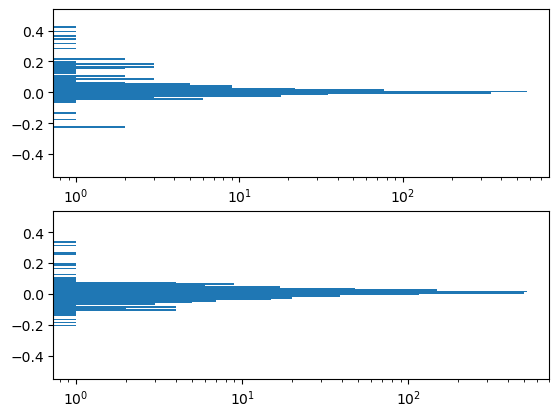

In [10]:
#two different ways to access and modify plots: plt, or fig/ax.
#interesting distribution where I'm pretty sure most samples have 0 or close ot 0 of both, then a few have more of 
#one or the other.
fig, ax = plt.subplots(2,1)
ax[0].hist(dino_CM_asv_freqs_18Sv4 - diatom_asv_freqs_18Sv4, bins = np.arange(-0.5, 0.5, 1e-2),
          orientation="horizontal", log = True)
ax[1].hist(dino_CM_asv_freqs_18Sv9 - diatom_asv_freqs_18Sv9, bins = np.arange(-0.5, 0.5, 1e-2),
          orientation="horizontal", log = True)
plt.show()

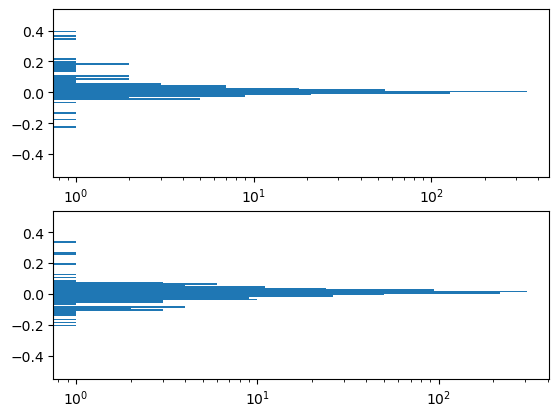

((623,), 790)

In [11]:
#filter out shallow samples...
#maybe it would be better to make the shallow/deep cutoff make more sense. like, "shallow" = anything at or above
#mixed layer depth for that sample...? MLD_sigma = mixed layer depth as calculated by sigma.

MLD_samples_18Sv4 = env_features_18Sv4.loc[ env_features_18Sv4["Bottle_Depth"] <= env_features_18Sv4["MLD_Sigma"] ].index
MLD_samples_18Sv9 = env_features_18Sv9.loc[ env_features_18Sv9["Bottle_Depth"] <= env_features_18Sv9["MLD_Sigma"] ].index

fig, ax = plt.subplots(2,1)
ax[0].hist(dino_CM_asv_freqs_18Sv4.loc[MLD_samples_18Sv4] \
        - diatom_asv_freqs_18Sv4.loc[MLD_samples_18Sv4], bins = np.arange(-0.5, 0.5, 1e-2),
       orientation = "horizontal", log = True)
ax[1].hist(dino_CM_asv_freqs_18Sv9.loc[MLD_samples_18Sv9] \
        - diatom_asv_freqs_18Sv9.loc[MLD_samples_18Sv9], bins = np.arange(-0.5, 0.5, 1e-2),
       orientation = "horizontal", log = True)
plt.show()
#shallow_samples_18Sv4.loc[shallow_samples_18Sv4["Bottle_Depth"] > 50]
#can likely assume MLD_sigma meant to be measured in meters, and isn't a unit of density.
#shallow_samples_18Sv4[["Bottle_Depth", "STheta", "MLD_Sigma"]]
MLD_samples_18Sv4.shape, MLD_samples_18Sv9.size

Final response variables, final sets of observation IDs.

In [12]:
MLD_dino_CM_diatom_difference_18Sv4 = dino_CM_asv_freqs_18Sv4.loc[MLD_samples_18Sv4] \
        - diatom_asv_freqs_18Sv4.loc[MLD_samples_18Sv4]

MLD_dino_CM_diatom_difference_18Sv9 = dino_CM_asv_freqs_18Sv9.loc[MLD_samples_18Sv9] \
        - diatom_asv_freqs_18Sv9.loc[MLD_samples_18Sv9]

### Predictor variables: which environmental variables can be removed early?

In [13]:
MLD_env_features_18Sv4 = env_features_18Sv4.loc[MLD_samples_18Sv4]
MLD_env_features_18Sv9 = env_features_18Sv9.loc[MLD_samples_18Sv9]
MLD_env_features_18Sv4.shape, MLD_env_features_18Sv9.shape

((623, 21), (790, 21))

In [14]:
categorical_env_features = env_features_18Sv4.select_dtypes(exclude=[float]).columns
numerical_env_features = env_features_18Sv4.select_dtypes(include=[float]).columns
categorical_env_features.size, numerical_env_features.size, env_features_18Sv4.columns.size

(3, 18, 21)

Pairwise spearman correlations of numerical variables, heatmapped. Decide which ones to drop.

In [15]:
MLD_env_features_18Sv4["RecInd"]

X201402_086.7_033.0_10    3.0
X201402_086.7_033.0_22    3.0
X201402_090.0_037.0_10    3.0
X201402_090.0_053.0_10    3.0
X201402_090.0_070.0_10    3.0
                         ... 
X202010_090.0_090.0_10    NaN
X202010_090.0_120.0_10    NaN
X202010_093.3_050.0_10    NaN
X202010_093.3_090.0_10    NaN
X202010_093.4_026.4_10    NaN
Name: RecInd, Length: 623, dtype: float64

(18, 18)

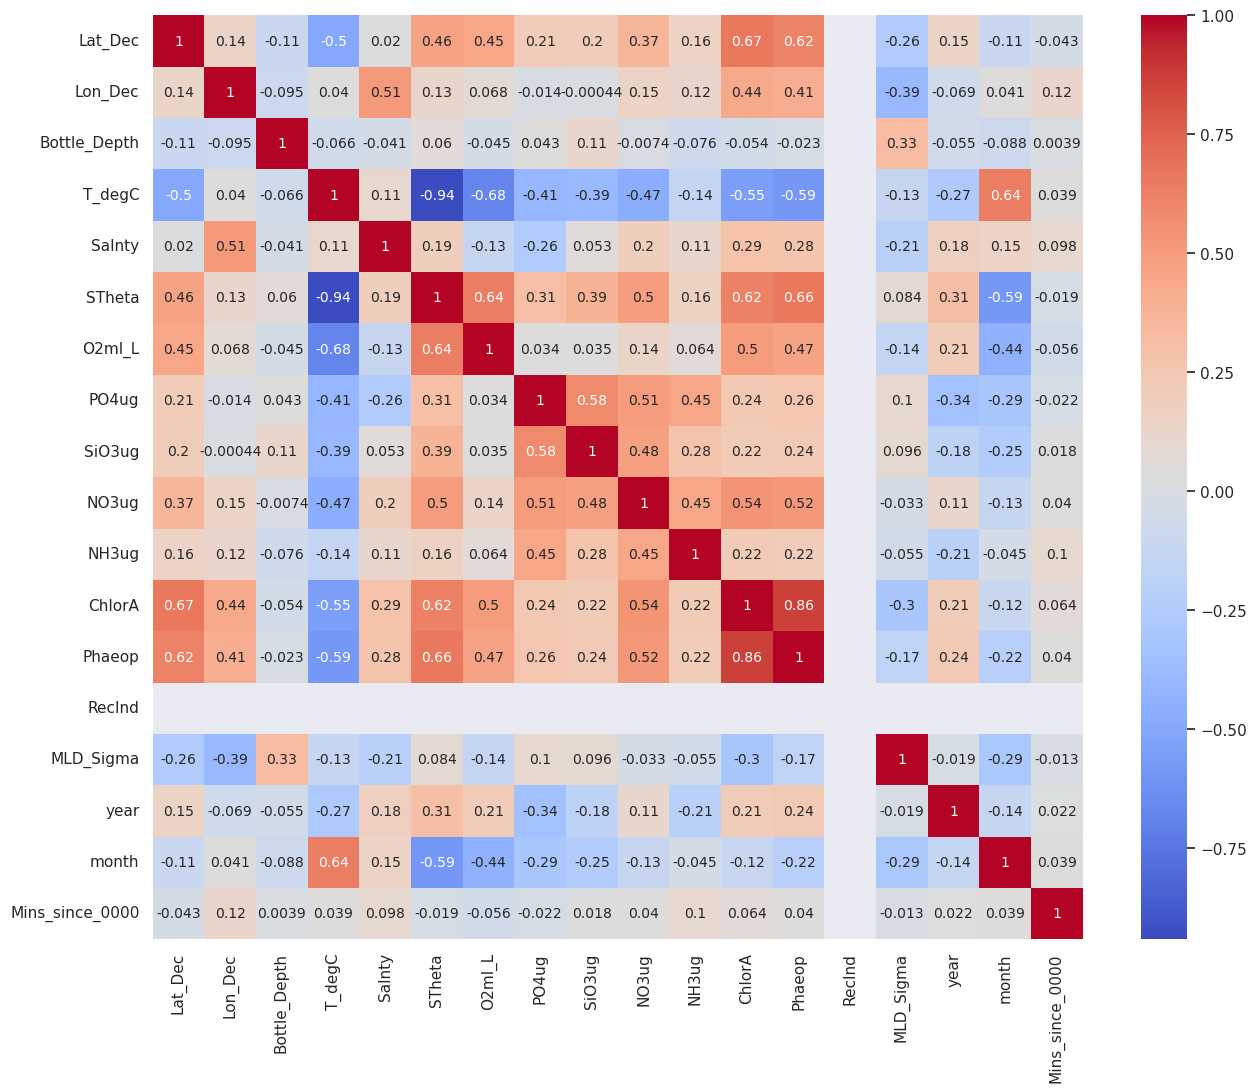

In [16]:
import seaborn as sns
#kendall, spearman both show similar looking graphs
feature_correlations_18Sv4 = MLD_env_features_18Sv4[numerical_env_features].corr(method="spearman")
with sns.set_theme(rc={'figure.figsize':(15,12), 'font.size':10}): #local context
    sns.heatmap(feature_correlations_18Sv4, cmap='coolwarm', annot=True)
feature_correlations_18Sv4.shape

Remove some correlated features, esp those that don't seem helpful: ChlorA and Phaeop (phaeophycin), can remove one of phosphate, silica, or nitrate; remove one of temperature, salinity, or O2?

In [17]:
final_numerical_feature_set = numerical_env_features.drop(["ChlorA", "Phaeop", "RecInd"])
final_numerical_feature_set

Index(['Lat_Dec', 'Lon_Dec', 'Bottle_Depth', 'T_degC', 'Salnty', 'STheta',
       'O2ml_L', 'PO4ug', 'SiO3ug', 'NO3ug', 'NH3ug', 'MLD_Sigma', 'year',
       'month', 'Mins_since_0000'],
      dtype='object')

In [18]:
#removes all rows with nan values
MLD_select_numeric_features_18Sv4 = MLD_env_features_18Sv4[final_numerical_feature_set].dropna()
MLD_select_numeric_features_18Sv9 = MLD_env_features_18Sv9[final_numerical_feature_set].dropna()
MLD_select_numeric_features_18Sv4.shape, MLD_select_numeric_features_18Sv9.shape

((570, 15), (734, 15))

In [19]:
season_onehot_18Sv4 = pd.get_dummies(MLD_env_features_18Sv4["season"], prefix="season")
season_onehot_18Sv9 = pd.get_dummies(MLD_env_features_18Sv9["season"], prefix="season")
#nan values are not given a number
season_onehot_18Sv4.shape, season_onehot_18Sv9.shape

((623, 4), (790, 4))

Final set of predictors: join MLD_select_numeric_features and onehots for each categorical variable.
(don't expect cardinal and cast type to be basis of any splits so leave them out?)

570 obs for 18Sv4, 734 for 18Sv9. could do a 9:1 train test split. 8:2 maybe.

In [20]:
#join right frame onto left frame using left frame index
X_18Sv4 = MLD_select_numeric_features_18Sv4.join(season_onehot_18Sv4, how="left")
X_18Sv9 = MLD_select_numeric_features_18Sv9.join(season_onehot_18Sv9, how="left")
X_18Sv4.shape, X_18Sv9.shape

((570, 19), (734, 19))

Final responses: prune MLD_dino_CM_diatom_difference_18Sv4 with index of X_18Sv4.

In [53]:
#y_18Sv4 = MLD_dino_CM_diatom_difference_18Sv4.loc[X_18Sv4.index]
#y_18Sv9 = MLD_dino_CM_diatom_difference_18Sv9.loc[X_18Sv9.index]

y_18Sv4 = CM_asv_freqs_18Sv4[X_18Sv4.index]
y_18Sv9 = CM_asv_freqs_18Sv9[X_18Sv9.index]

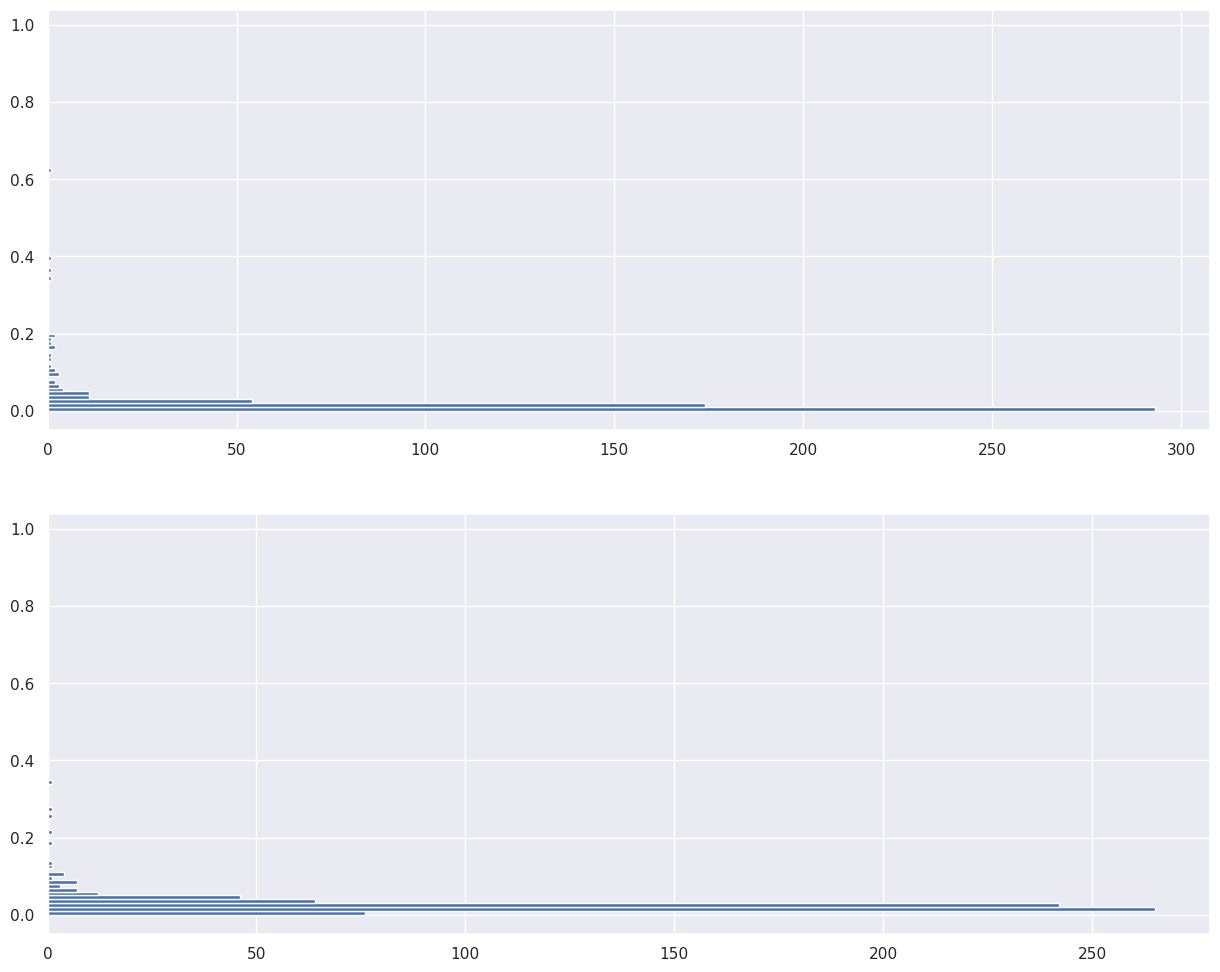

In [63]:
fig, ax = plt.subplots(2,1)
ax[0].hist(y_18Sv4, bins = np.arange(0, 1, 1e-2), orientation = "horizontal", log = False)
ax[1].hist(y_18Sv9, bins = np.arange(0, 1, 1e-2), orientation = "horizontal", log = False)
plt.show()

### Bagging Model: Predict difference of per sample dino-CM and diatom percentages (MLD_dino_CM_diatom_difference_18Sv4, 9) in mixed layer depth samples with environmental variables.

Can we identify environmental types with different properties? (expect that many environments will look exactly the same, since response value close to 0).

**Train test split**

There's 1 feature dataset and 2 response datasets, we're going to use ~20% of the features to test later
Make a selection vector and use it to make Xtrain, Xtest, y1train, y1test, y2train, y2test?

Problem! Say I make an ensemble model fitted to 80% of either response vector. If we're starting with the premise that v4 and v9 offer very different views... which one is actually correct? is the test set just going to be "every single observation twice, except associated with two different responses each time?" what would accuracy on something like that even mean?

it would be one thing to have 2 models where ASV data are predictors and something biogeochemical is the response (bowman)...

In [54]:
X_train_18Sv4, X_test_18Sv4, y_train_18Sv4, y_test_18Sv4 = train_test_split(
    X_18Sv4, 
    y_18Sv4,
    test_size = 0.2, 
    random_state = 0
)

X_train_18Sv9, X_test_18Sv9, y_train_18Sv9, y_test_18Sv9 = train_test_split(
    X_18Sv9, 
    y_18Sv9,
    test_size = 0.2, 
    random_state = 0
)

Tuning number of bagging estimators: is it important? Doesn't seem so, but that's probably more the nature of the data (mostly 0s).

Use 20 estimators, see how results turn out.

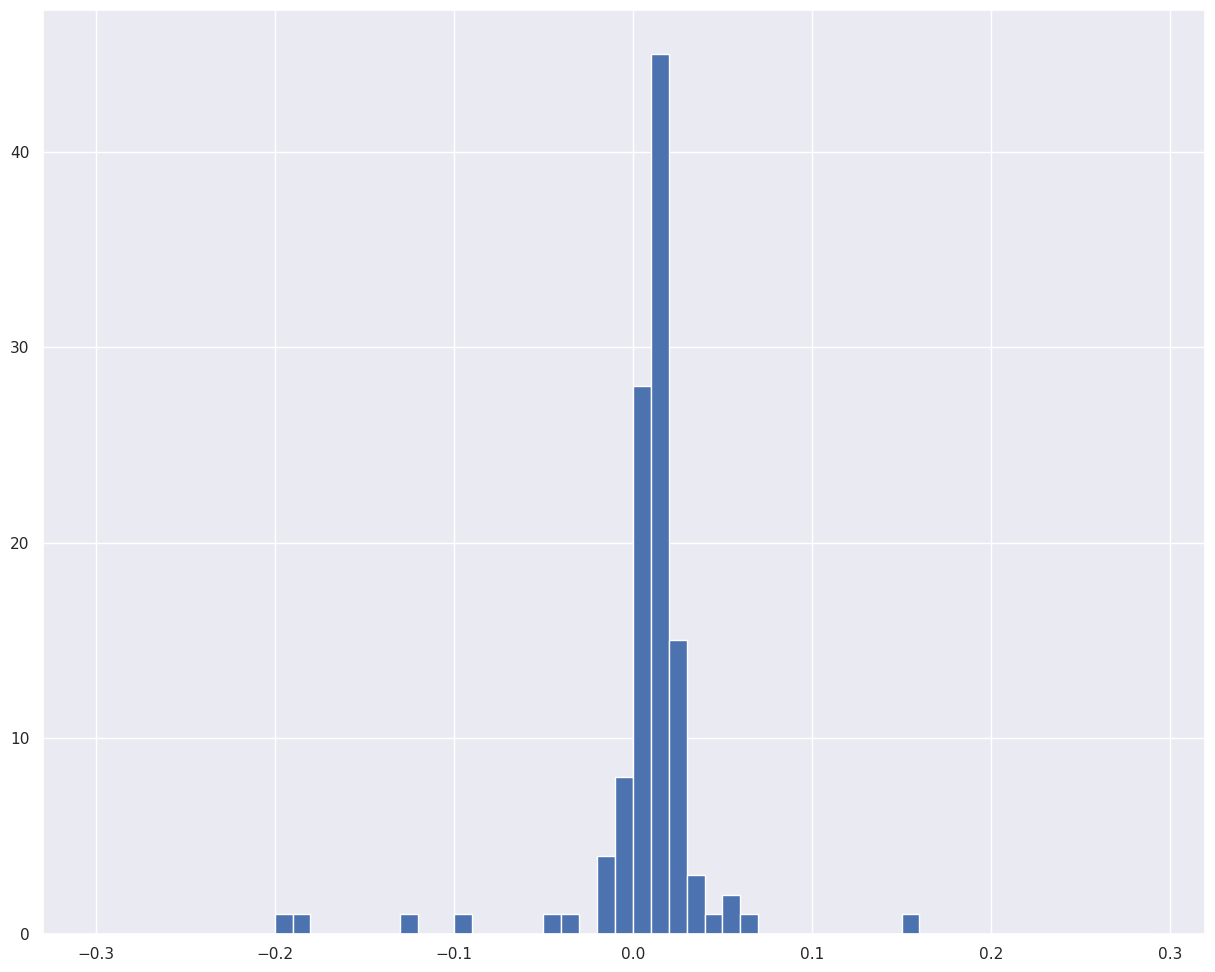

0.0013898093124812504

In [55]:
model_18Sv4 = BaggingRegressor(
    #estimator=DecisionTreeRegressor(), #see if we get better results by stopping splits earlier
    n_estimators = 20,
    random_state=0
).fit(X_train_18Sv9, y_train_18Sv9)

residuals = (model_18Sv4.predict(X_test_18Sv4) - y_test_18Sv4)
fig, ax = plt.subplots()
ax.hist(residuals, bins = np.arange(-.3, .3, 1e-2))
plt.show()

np.mean(residuals ** 2)# ** 0.5

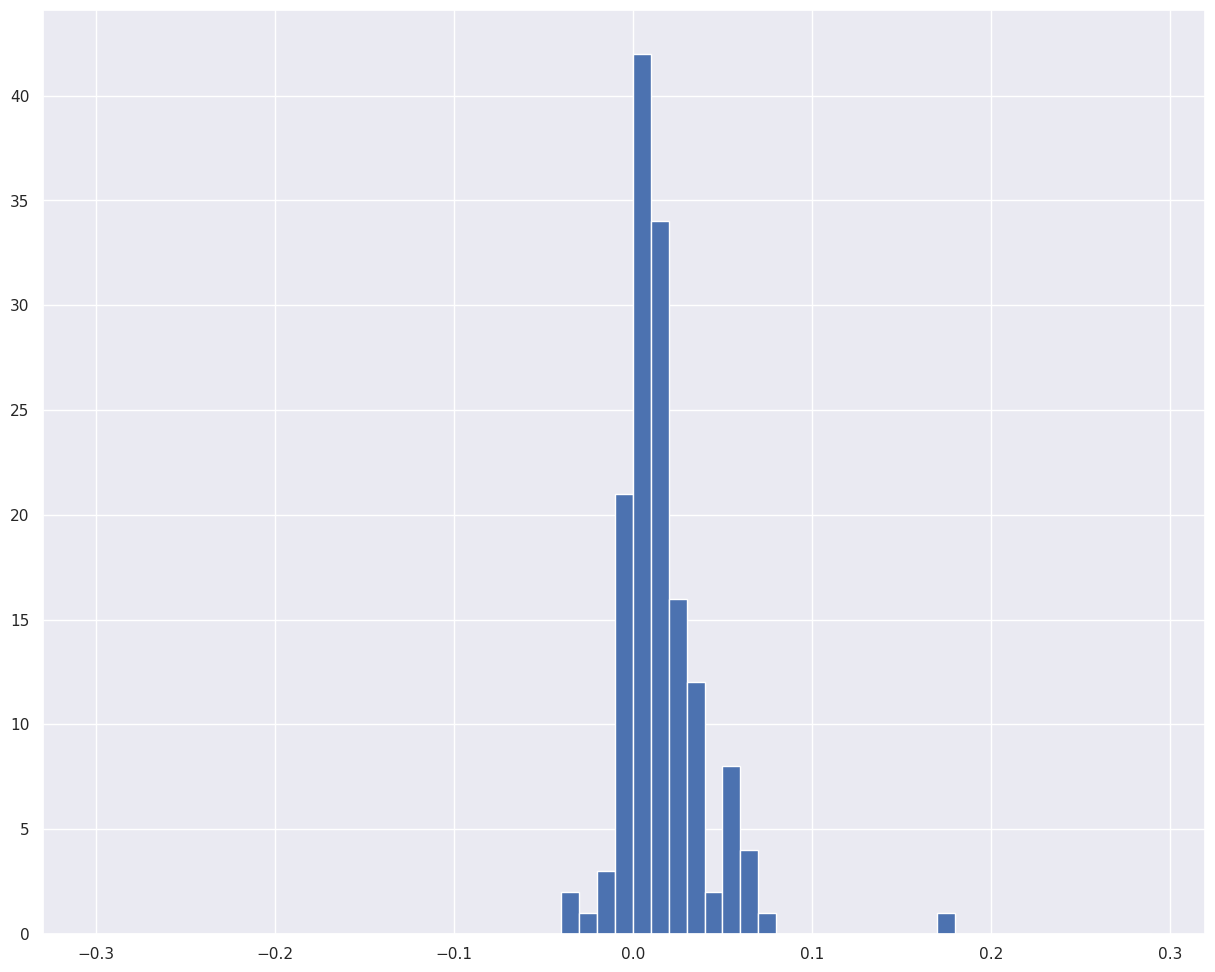

(0.000816583252181283, -0.05710672973840667)

In [56]:
model_env_dino_CM_percent_18Sv9 = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=6), #see if we get better results by stopping splits earlier
    n_estimators = 20,
    random_state=0
).fit(X_train_18Sv9, y_train_18Sv9)

y_pred_18Sv9 = model_env_dino_CM_percent_18Sv4.predict(X_test_18Sv9)
residuals = (y_test_18Sv9 - y_pred_18Sv9)
fig, ax = plt.subplots()
ax.hist(residuals, bins=np.arange(-.3,.3,1e-2))
plt.show()

np.mean(residuals ** 2), np.min(y_pred_18Sv9) #wouldn't expect to go below 0

### Contribution to Reducing SS_residual by Each Variable

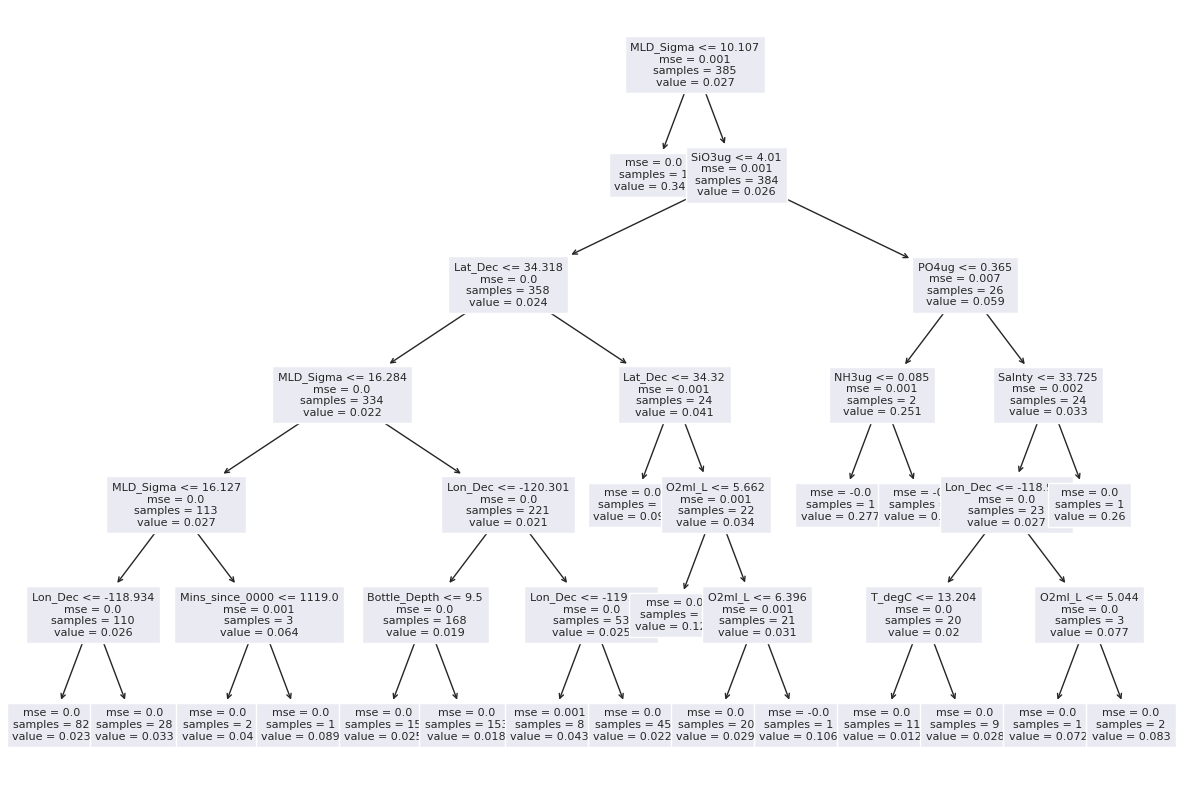

In [57]:
plt.figure(figsize=(15,10))
plot_tree(model_env_dino_CM_percent_18Sv9.estimators_[3],feature_names=X_train_18Sv9.columns, fontsize=8)
plt.show()

In [58]:
#need a way to access every tree and every split, and count the involvement of each feature
#we can see that every estimator was working from the same set of features
model_env_dino_CM_percent_18Sv9.estimators_features_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 

In [59]:
for estimator in model_env_dino_CM_percent_18Sv9.estimators_:
    #binary tree stored as parallel arrays, each array holds info about ith node (internal or leaf)
    tree = estimator.tree_
    print(tree)
    #every -2 represents a leaf node
    #print(tree.feature)
    #mse is the impurity measure for regression
    #print(tree.impurity)

#a good split will decrease the amount of impurity? not necessarily. might split into a large low mse node
#and a small, high mse node. so they have to be weighted?
#MSE decrease = MSE_parent - sum(MSE_children)
#does not need to be calculated when "MSE parent" would be a leaf node.

In [60]:
total_se_decrease=[0] * X_train_18Sv4.columns.size

for estimator in model_env_dino_CM_percent_18Sv9.estimators_:
    tree = estimator.tree_
    for node_id in range(len(tree.feature)):
        #if this node is a leaf, skip
        feature_id = tree.feature[node_id]
        if feature_id < 0:
            continue
        #if node is not a leaf, find MSE_parent - sum(MSE_children)
        left_child_id = tree.children_left[node_id]
        right_child_id = tree.children_right[node_id]
        SE_parent = tree.impurity[node_id] * tree.n_node_samples[node_id]
        SE_children = (tree.impurity[left_child_id] * tree.n_node_samples[left_child_id]) \
                    + (tree.impurity[right_child_id] * tree.n_node_samples[right_child_id])
        #seems like we can't count on this, a split will choose a bad option even if it's "best"
        #assert(SE_parent >= SE_children)
        #if SE_parent < SE_children:
        #    print(SE_parent, tree.impurity[node_id], tree.n_node_samples[node_id])
        #    print(SE_children, tree.impurity[left_child_id], tree.n_node_samples[left_child_id])
        #    print(tree.impurity[right_child_id], tree.n_node_samples[right_child_id])
        #    print(tree)
        #    assert(False)
        #attribute the MSE decrease to the feature that this node splits on
        total_se_decrease[feature_id] += (SE_parent - SE_children)
        
pd.Series(total_se_decrease, index=X_train_18Sv9.columns).sort_values(ascending=False)

MLD_Sigma          1.985772
Salnty             0.436398
Lat_Dec            0.395671
O2ml_L             0.379676
T_degC             0.228387
PO4ug              0.218576
SiO3ug             0.168960
Lon_Dec            0.158331
Bottle_Depth       0.140270
month              0.125300
NH3ug              0.100884
STheta             0.068968
season_summer      0.062274
year               0.058565
Mins_since_0000    0.045256
NO3ug              0.009825
season_fall        0.005572
season_spring      0.002555
season_winter      0.001306
dtype: float64